In [20]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.optimize import curve_fit
from scipy.integrate import quad

In [21]:
ha_list = [('8133-12705', 0.130943), ('8256-12704', 0.12611), ('8616-3703', 0.135063),
             ('8720-12702', 0.134953), ('8721-3701', 0.118101)]
#('8137-9101', 0.118865),

ha_list_uncertain = ['8155-6103(?)', '8254-6103(?)', '8338-12705(?)', '8606-12704(?)']

ha_list2 = [('7815-6103', 0.135043), ('7991-12705', 0.113153), ('7992-9102', 0.119399), ('8132-6101', 0.129403),
             ('8132-12703', 0.116056), ('8133-12704', 0.134471), ('8137-3702', 0.131997),
             ('8143-6101', 0.126168), ('8244-12704', 0.115137), ('8318-6102', 0.12908), ('8329-6102', 0.142887),
             ('8439-3703', 0.138619), ('8448-3703', 0.138746), ('8464-6101', 0.125582), ('9049-1901', 0.131457)]

obj1_43214 = [('8135-1902', 0.117997)]

ha_list2_uncertain = ['8454-6102(?)', '8552-9102(?)', '8717-1902(?)']

In [22]:
def spectrum_gen(flux, ivar):    
    n = len(flux)
    sumflux = np.zeros(4563)

    for i in range(n):
        for j in range(n):
            flux_ = flux[i,j] * ~do_not_use[i,j]
            flux_filtered = sigma_gen_compare(ivar[i,j], flux_)
            sumflux = np.add(sumflux, flux_)
    return sumflux

In [23]:
def sigma_gen_compare(ivar, flux_masked):
    
    # change ivar array to sigma array 
    
    sigma = np.sqrt(np.abs(np.divide(1, ivar, where = ivar != 0)))
#     print(sigma)
    
    is_less_than_3sigma = flux_masked < 3 * sigma # compare the sigma array 
#     print(flux_masked)
#     print(is_less_than_3sigma)
        
    flux_masked_filtered = flux_masked * ~is_less_than_3sigma # multiply the truth value
    
    return flux_masked_filtered

In [24]:
def gaussian(x, amp, mean, sigma, base):
    return (amp * np.exp(-(x-mean)**2 / (2*sigma**2))) + base

6563 6548 6583

In [26]:
(6583+6548)/2, 6583-6548, 6555, 6575

(6565.5, 35, 6555, 6575)

In [27]:
# np.where(np.logical_and(wave > 6555, wave < 6576))

In [28]:
# wave[2577], wave[2590]

In [29]:
# lb_ha = 2577
# ub_ha = 2590

# lb_6548 = 6533
# ub_6548 = 6563

# lb_6583 = 6568
# ub_6583 = 6598

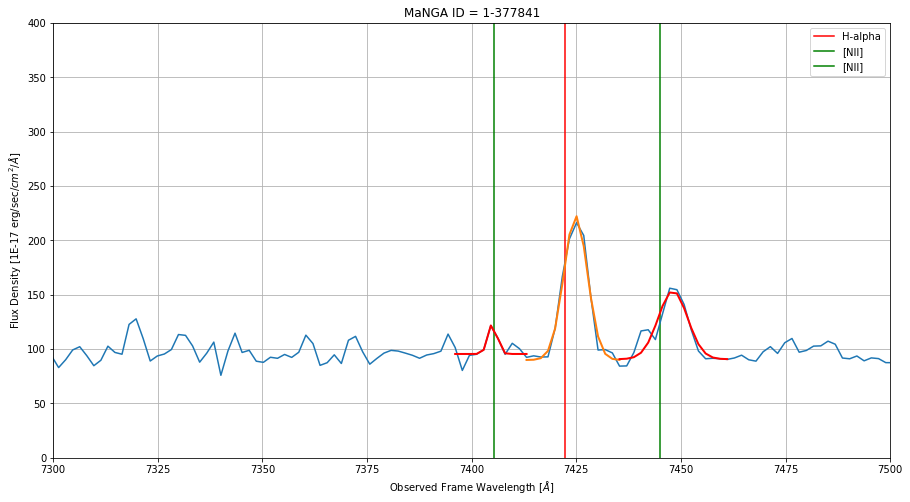

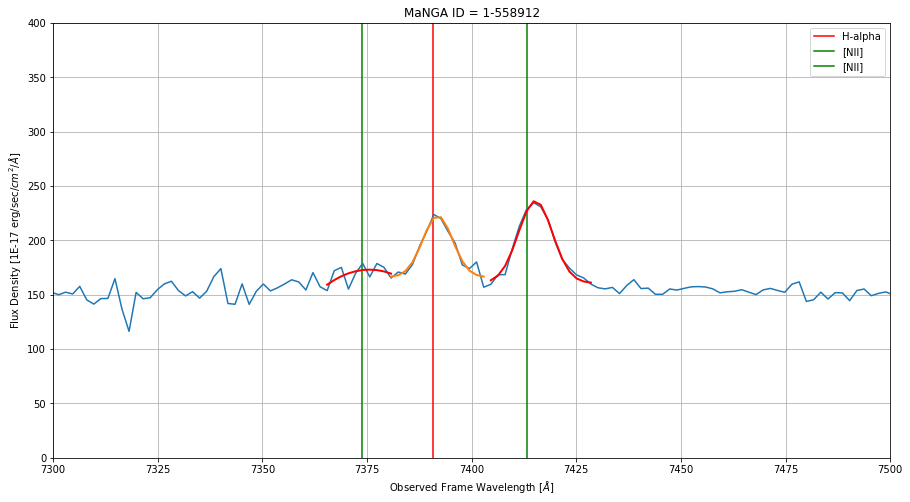

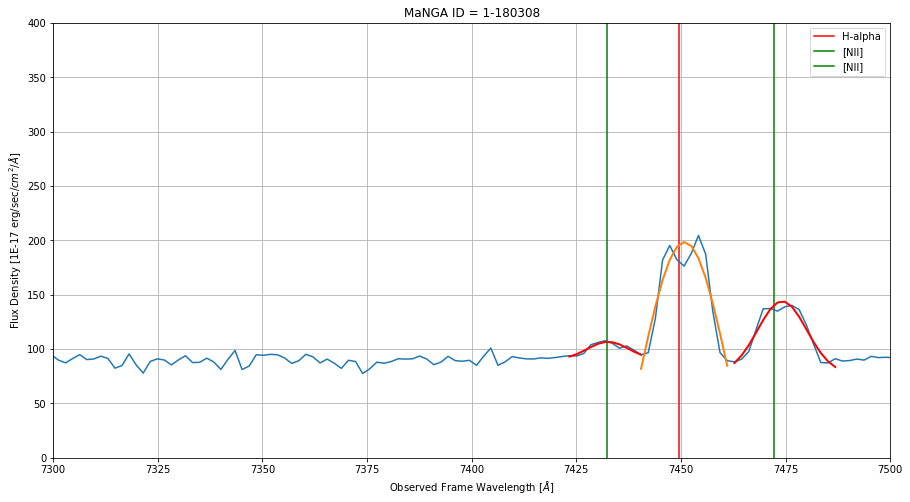

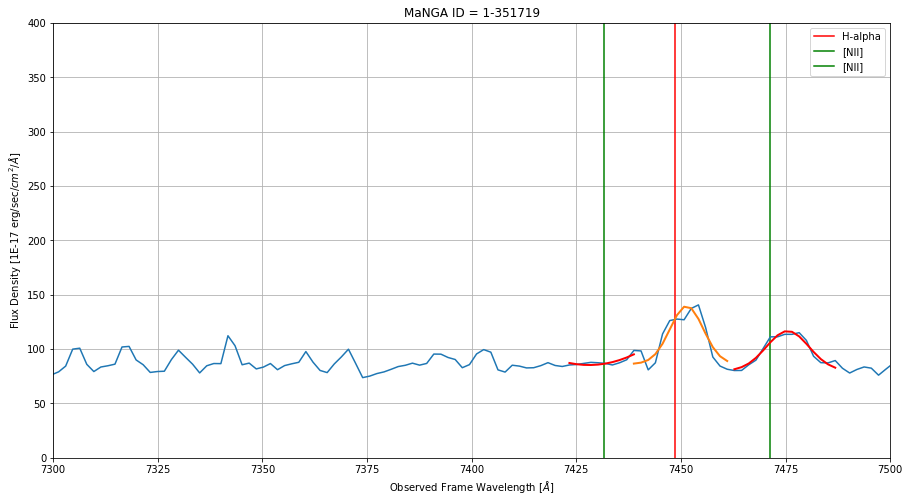

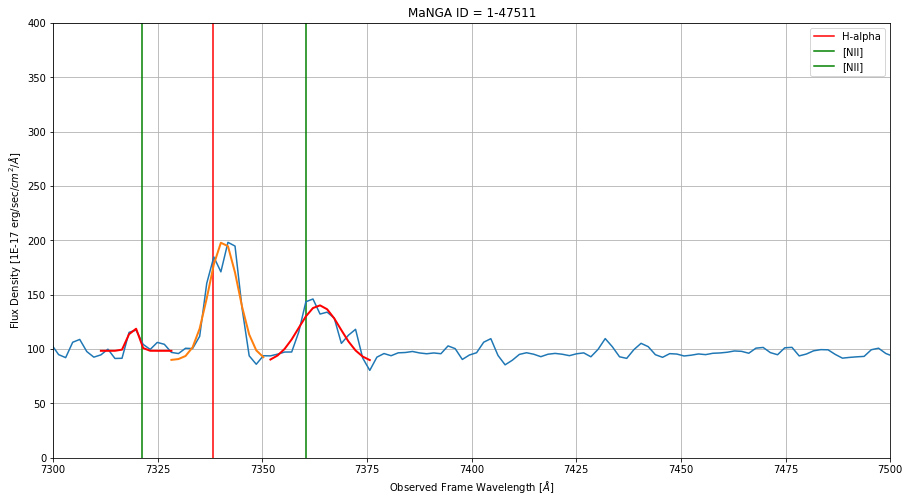

In [59]:
for plateifu in ha_list:
#     print(plateifu)
    data = fits.open(f'/Volumes/WD_External/MaNGA_Sample/manga-{plateifu[0]}-LOGCUBE.fits.gz')
    mangaid = data[0].header['MANGAID']
    
    flux = np.transpose(data['FLUX'].data, axes = (2, 1, 0))

    ivar = np.transpose(data['IVAR'].data, axes = (2, 1, 0))

    mask = np.transpose(data['MASK'].data, axes = (2, 1, 0))
    
    do_not_use = (mask & 2**10) != 0 
    
    wave = data['WAVE'].data
    
    sumflux = spectrum_gen(flux, ivar)
    
    peak_ha = 6563 * (1 + plateifu[1])
    peak_6548 = 6548 * (1 + plateifu[1])
    peak_6583 = 6583 *(1 + plateifu[1])
#     print(peak) 
    bound_ha = np.where(np.logical_and(wave > peak_ha-10, wave < peak_ha+15))
    bound_6548 = np.where(np.logical_and(wave > peak_6548-10, wave < peak_6548+10))
    bound_6583 = np.where(np.logical_and(wave > peak_6583-10, wave < peak_6583+18))
    
#     print('bound', bound_6548, bound_6583)
    
    lb_ha = bound_ha[0][0]
    ub_ha = bound_ha[0][-1]
    
    lb_6548 = bound_6548[0][0]
    ub_6548 = bound_6548[0][-1] 
    
    lb_6583 = bound_6583[0][0]
    ub_6583 = bound_6583[0][-1] 
    
#     print(lb_6548, ub_6548, lb_ha, ub_ha, lb_6583, ub_6583)
#     print(wave[lb_6548], wave[ub_6548], wave[lb_ha], wave[ub_ha], wave[lb_6583], wave[ub_6583])
    
    sumflux_slice_ha = sumflux[lb_ha : ub_ha]
    sumflux_slice_6548 = sumflux[lb_6548 : ub_6548]
    sumflux_slice_6583 = sumflux[lb_6583 : ub_6583]
    
#     sumflux_slice = sumflux[lb_6548 : ub_6583]
    
#     print('sumflux_slice',sumflux_slice)

    wave_slice_ha = wave[lb_ha : ub_ha]
    wave_slice_6548 = wave[lb_6548 : ub_6548]
    wave_slice_6583 = wave[lb_6583 : ub_6583]
    
#     wave_slice = wave[lb_6548 : ub_6583]
    
#     print('wave_slice', wave_slice)
    
    amp_ha = max(sumflux_slice_ha)
    mean_ha = peak_ha
    sigma_ha = np.std(wave_slice_ha)
    base_ha = min(sumflux_slice_ha)
    
    amp_6548 = max(sumflux_slice_6548)
    mean_6548 = peak_6548
    sigma_6548 = np.std(wave_slice_6548)
    base_6548 = min(sumflux_slice_6548)
    
    amp_6583 = max(sumflux_slice_6583)
    mean_6583 = peak_6583
    sigma_6583 = np.std(wave_slice_6583)
    base_6583 = min(sumflux_slice_6583)

#     base = min(sumflux_slice)
    
#     p0_ = [amp_ha, amp_6548, amp_6583,
#            mean_ha, mean_6548, mean_6583,
#            sigma_ha, sigma_6548, sigma_6583,
#            base]

    p0_ha = [amp_ha, mean_ha, sigma_ha, base_ha]
    p0_6548 = [amp_6548, mean_6548, sigma_6548, base_6548]
    p0_6583 = [amp_6583, mean_6583, sigma_6583, base_6583]
    
    popt_ha, pcov_ha = curve_fit(gaussian, wave_slice_ha, sumflux_slice_ha, p0 = p0_ha)
    popt_6548, pcov_6548 = curve_fit(gaussian, wave_slice_6548, sumflux_slice_6548, p0 = p0_6548)
    popt_6583, pcov_6583 = curve_fit(gaussian, wave_slice_6583, sumflux_slice_6583, p0 = p0_6583)
    
#     print('popt', popt)
#     print('pcov', pcov)
    
# #     print('amp', amp)
# #     print('sigma', sigma)
# #     print('base', base)
    
#     popt, pcov = curve_fit(gaussian, wave_slice, sumflux_slice, p0 = [amp, mean, sigma, base])
# #     print('popt', popt)
# #     print('pcov', pcov)
    
# #     plt.plot(wave_slice, gaussian(wave_slice, *popt))
# #     plt.show()
    
# #     print(sumflux, len(sumflux))
    
    plt.figure(figsize = (15,8))
    plt.grid()
    plt.axvline(6563*(1+plateifu[1]), color = 'red', label = 'H-alpha')
    plt.axvline(6548*(1+plateifu[1]), color = 'green', label = '[NII]')
    plt.axvline(6583*(1+plateifu[1]), color = 'green', label = '[NII]')
    plt.legend()
#     plt.axvline(wave[lb], color = 'deeppink')
#     plt.axvline(wave[ub], color = 'deeppink')
#     plt.xlim(6300,6700)
    plt.xlim(7300, 7500)
#     plt.xlim(wave[lb]-10, wave[ub]+10)
    plt.ylim(0,400)
    plt.xlabel('Observed Frame Wavelength ' + r'[$\AA$]')
    plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
    plt.title(f'MaNGA ID = {mangaid}')
    
    plt.plot(wave, sumflux)
    
    plt.plot(wave_slice_ha, gaussian(wave_slice_ha, *popt_ha), linewidth = 2)
    plt.plot(wave_slice_6548, gaussian(wave_slice_6548, *popt_6548), linewidth = 2, color = 'red')
    plt.plot(wave_slice_6583, gaussian(wave_slice_6583, *popt_6583), linewidth = 2, color = 'red')
    
    plt.show()

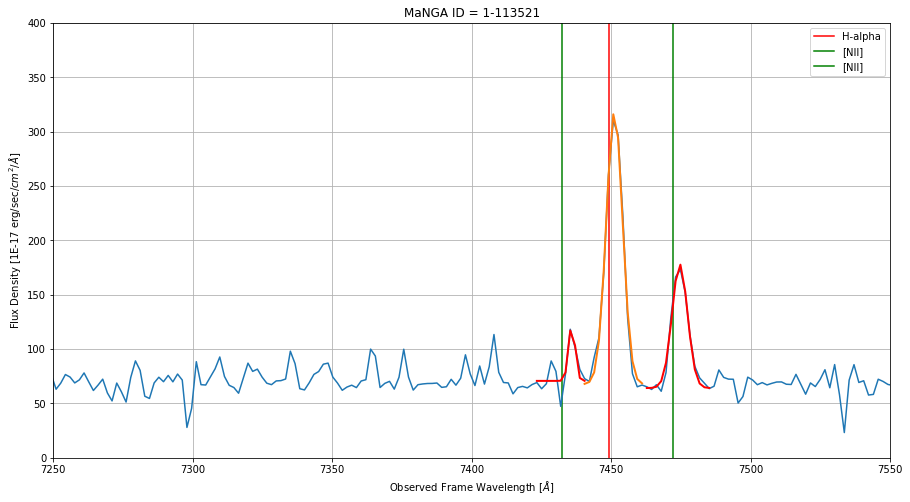

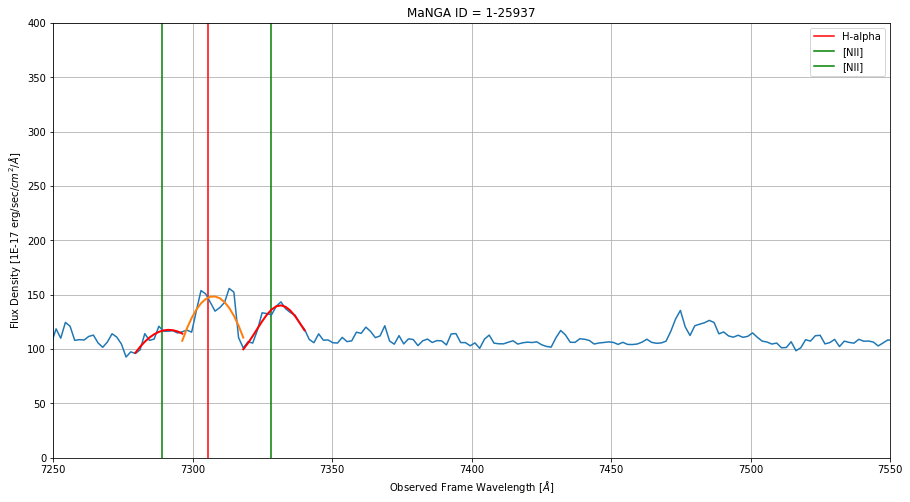

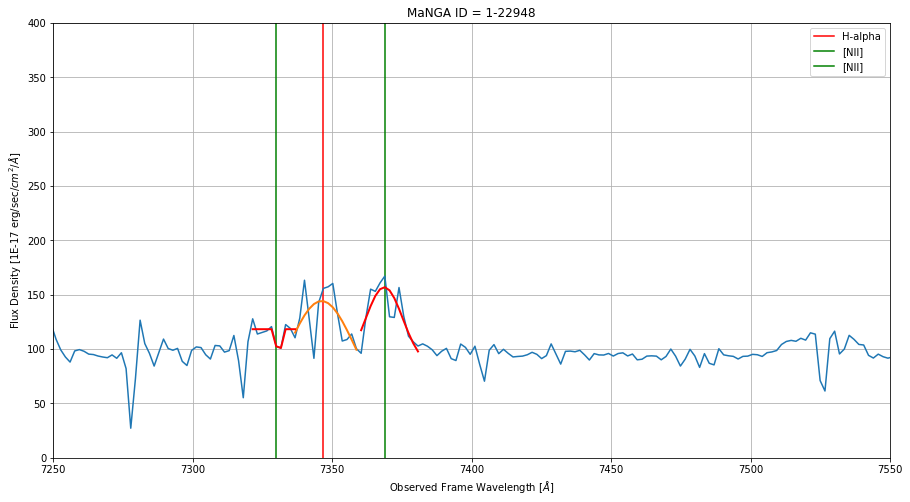

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


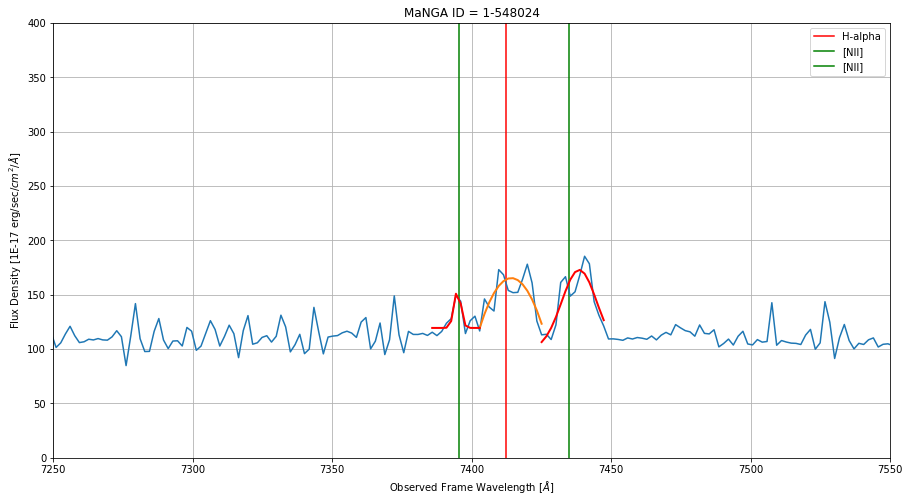

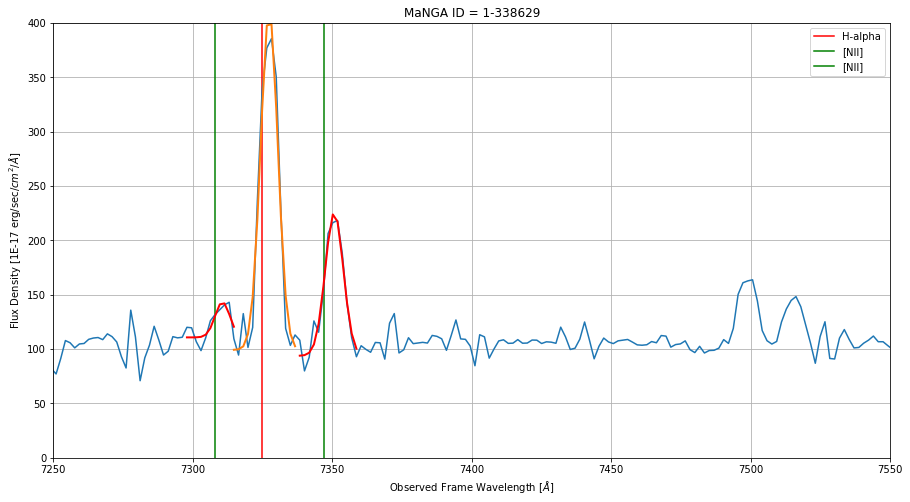

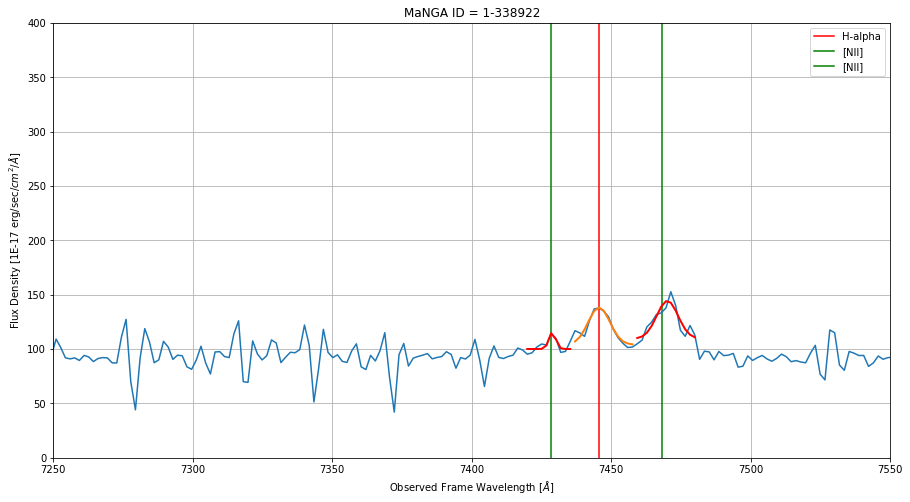

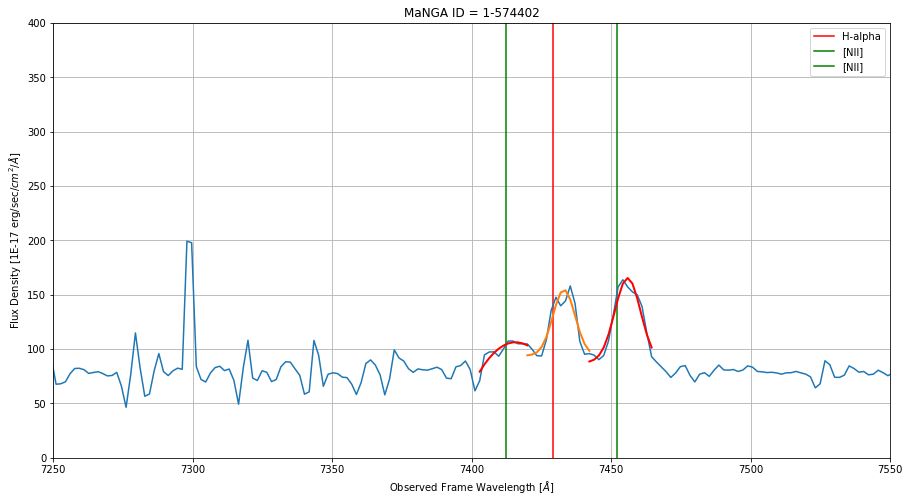

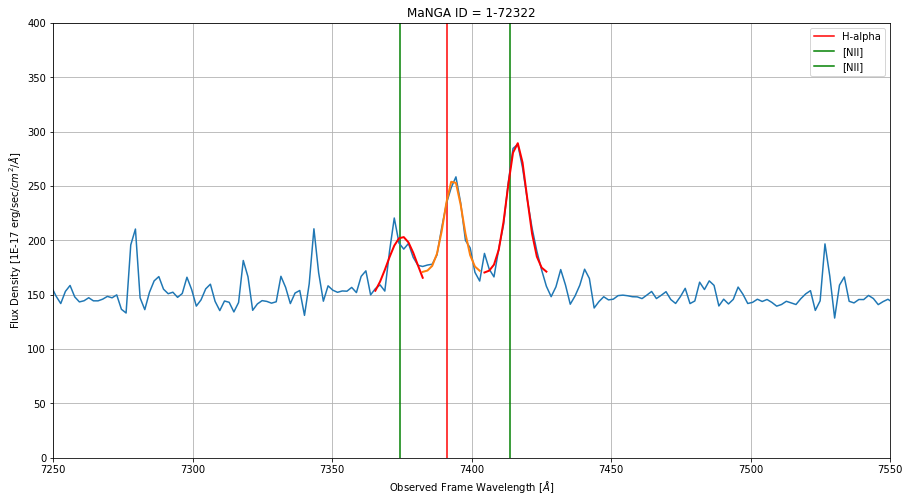

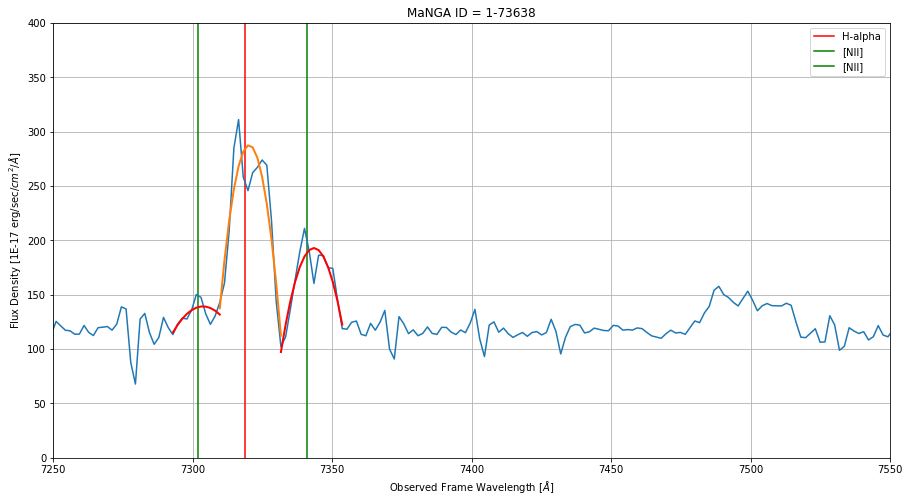

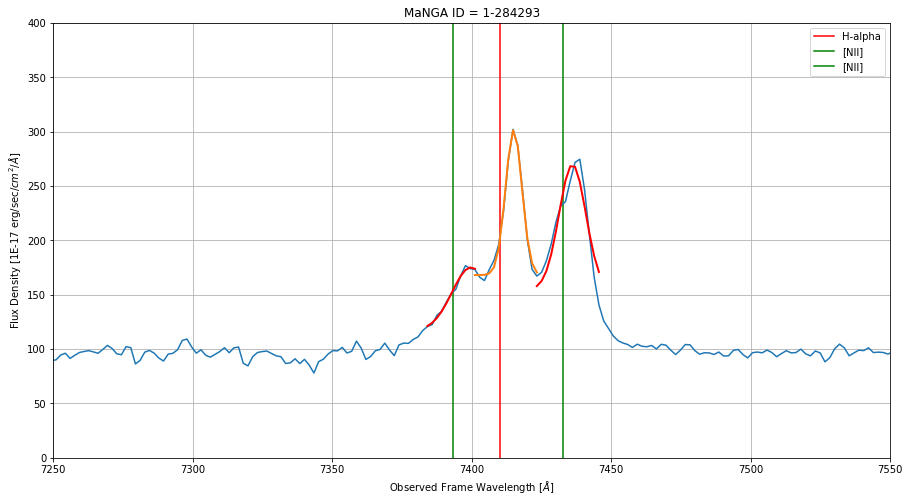

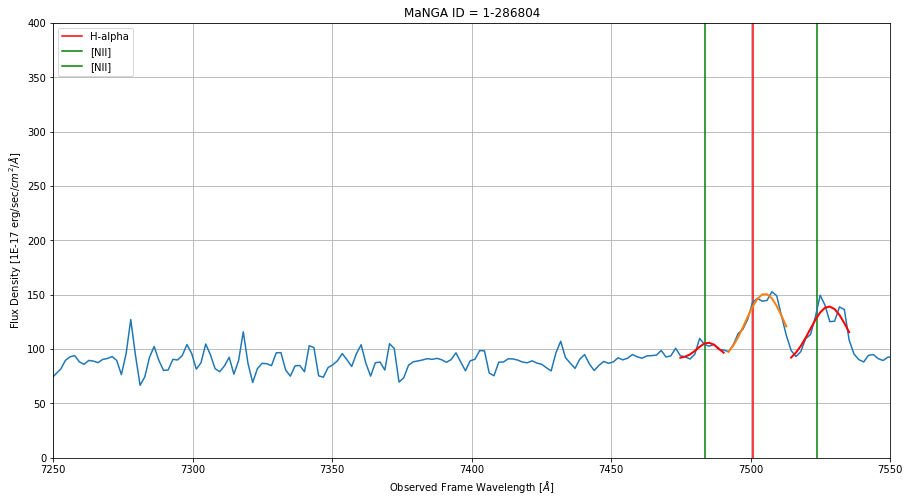

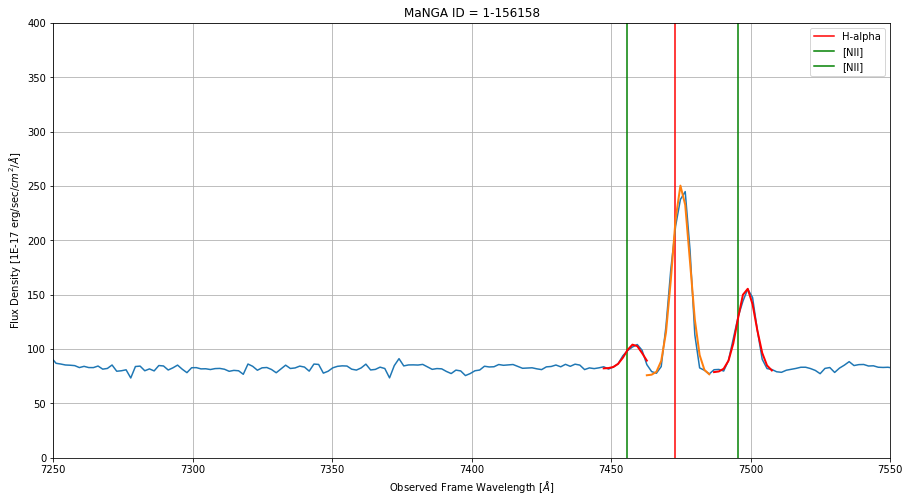

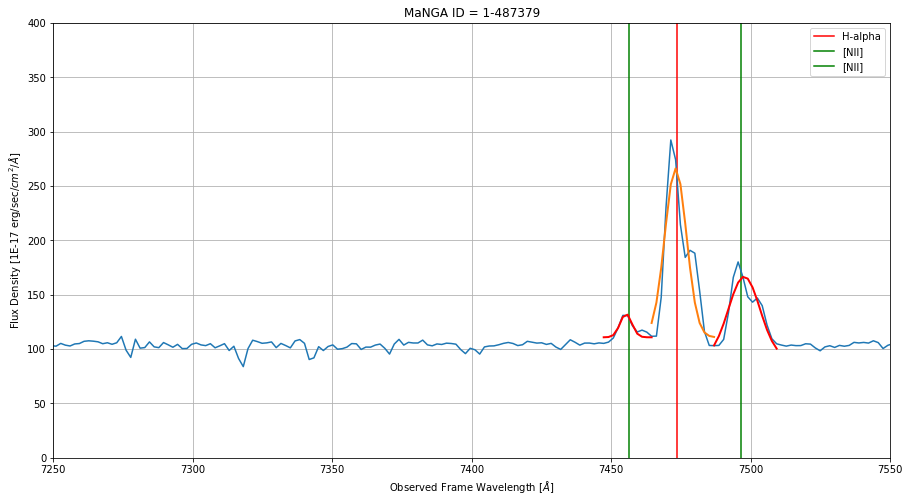

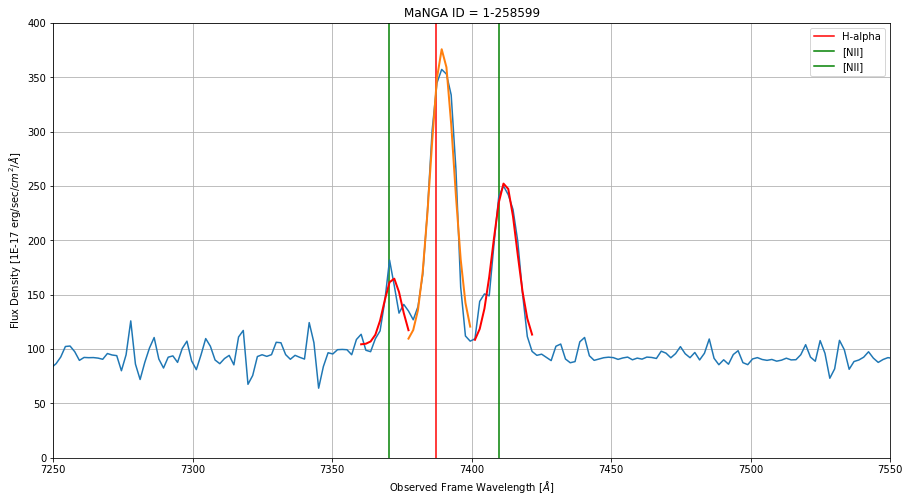

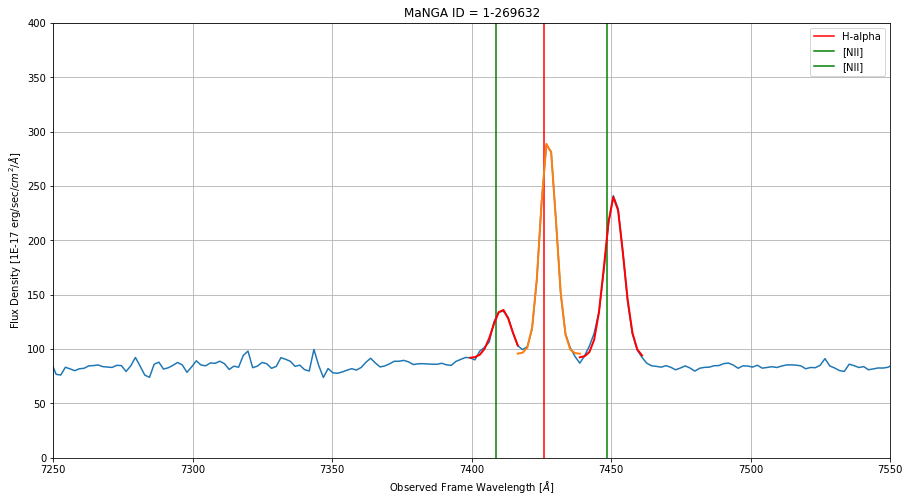

In [36]:
for plateifu in ha_list2:
#     print(plateifu)
    data = fits.open(f'/Volumes/WD_External/MaNGA_Sample_with_[OIII]/manga-{plateifu[0]}-LOGCUBE.fits.gz')
    mangaid = data[0].header['MANGAID']
    
    flux = np.transpose(data['FLUX'].data, axes = (2, 1, 0))

    ivar = np.transpose(data['IVAR'].data, axes = (2, 1, 0))

    mask = np.transpose(data['MASK'].data, axes = (2, 1, 0))
    
    do_not_use = (mask & 2**10) != 0 
    
    wave = data['WAVE'].data
    
    sumflux = spectrum_gen(flux, ivar)
    
    peak_ha = 6563 * (1 + plateifu[1])
    peak_6548 = 6548 * (1 + plateifu[1])
    peak_6583 = 6583 *(1 + plateifu[1])
#     print(peak) 
    bound_ha = np.where(np.logical_and(wave > peak_ha-10, wave < peak_ha+15))
    bound_6548 = np.where(np.logical_and(wave > peak_6548-10, wave < peak_6548+10))
    bound_6583 = np.where(np.logical_and(wave > peak_6583-10, wave < peak_6583+15))
    
#     print('bound', bound_6548, bound_6583)
    
    lb_ha = bound_ha[0][0]
    ub_ha = bound_ha[0][-1]
    
    lb_6548 = bound_6548[0][0]
    ub_6548 = bound_6548[0][-1] 
    
    lb_6583 = bound_6583[0][0]
    ub_6583 = bound_6583[0][-1] 
    
#     print(lb_6548, ub_6548, lb_ha, ub_ha, lb_6583, ub_6583)
#     print(wave[lb_6548], wave[ub_6548], wave[lb_ha], wave[ub_ha], wave[lb_6583], wave[ub_6583])
    
    sumflux_slice_ha = sumflux[lb_ha : ub_ha]
    sumflux_slice_6548 = sumflux[lb_6548 : ub_6548]
    sumflux_slice_6583 = sumflux[lb_6583 : ub_6583]
    
#     sumflux_slice = sumflux[lb_6548 : ub_6583]
    
#     print('sumflux_slice',sumflux_slice)

    wave_slice_ha = wave[lb_ha : ub_ha]
    wave_slice_6548 = wave[lb_6548 : ub_6548]
    wave_slice_6583 = wave[lb_6583 : ub_6583]
    
#     wave_slice = wave[lb_6548 : ub_6583]
    
#     print('wave_slice', wave_slice)
    
    amp_ha = max(sumflux_slice_ha)
    mean_ha = peak_ha
    sigma_ha = np.std(wave_slice_ha)
    base_ha = min(sumflux_slice_ha)
    
    amp_6548 = max(sumflux_slice_6548)
    mean_6548 = peak_6548
    sigma_6548 = np.std(wave_slice_6548)
    base_6548 = min(sumflux_slice_6548)
    
    amp_6583 = max(sumflux_slice_6583)
    mean_6583 = peak_6583
    sigma_6583 = np.std(wave_slice_6583)
    base_6583 = min(sumflux_slice_6583)

#     base = min(sumflux_slice)
    
#     p0_ = [amp_ha, amp_6548, amp_6583,
#            mean_ha, mean_6548, mean_6583,
#            sigma_ha, sigma_6548, sigma_6583,
#            base]

    p0_ha = [amp_ha, mean_ha, sigma_ha, base_ha]
    p0_6548 = [amp_6548, mean_6548, sigma_6548, base_6548]
    p0_6583 = [amp_6583, mean_6583, sigma_6583, base_6583]
    
    popt_ha, pcov_ha = curve_fit(gaussian, wave_slice_ha, sumflux_slice_ha, p0 = p0_ha)
    popt_6548, pcov_6548 = curve_fit(gaussian, wave_slice_6548, sumflux_slice_6548, p0 = p0_6548)
    popt_6583, pcov_6583 = curve_fit(gaussian, wave_slice_6583, sumflux_slice_6583, p0 = p0_6583)
    
#     print('popt', popt)
#     print('pcov', pcov)
    
# #     print('amp', amp)
# #     print('sigma', sigma)
# #     print('base', base)
    
#     popt, pcov = curve_fit(gaussian, wave_slice, sumflux_slice, p0 = [amp, mean, sigma, base])
# #     print('popt', popt)
# #     print('pcov', pcov)
    
# #     plt.plot(wave_slice, gaussian(wave_slice, *popt))
# #     plt.show()
    
# #     print(sumflux, len(sumflux))
    
    plt.figure(figsize = (15,8))
    plt.grid()
    plt.axvline(6563*(1+plateifu[1]), color = 'red', label = 'H-alpha')
    plt.axvline(6548*(1+plateifu[1]), color = 'green', label = '[NII]')
    plt.axvline(6583*(1+plateifu[1]), color = 'green', label = '[NII]')
    plt.legend()
#     plt.axvline(wave[lb], color = 'deeppink')
#     plt.axvline(wave[ub], color = 'deeppink')
#     plt.xlim(6300,6700)
    plt.xlim(7250, 7550)
#     plt.xlim(wave[lb]-10, wave[ub]+10)
    plt.ylim(0,400)
    plt.xlabel('Observed Frame Wavelength ' + r'[$\AA$]')
    plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
    plt.title(f'MaNGA ID = {mangaid}')
    
    plt.plot(wave, sumflux)
    
    plt.plot(wave_slice_ha, gaussian(wave_slice_ha, *popt_ha), linewidth = 2)
    plt.plot(wave_slice_6548, gaussian(wave_slice_6548, *popt_6548), linewidth = 2, color = 'red')
    plt.plot(wave_slice_6583, gaussian(wave_slice_6583, *popt_6583), linewidth = 2, color = 'red')
    
    plt.show()

In [43]:
def gaussian_1_43214(x, amp, mean, sigma):
    return (amp * np.exp(-(x-mean)**2 / (2*sigma**2)))

In [45]:
def three_gaussian(x, 
                   a_ha, a_6548, a_6583,
                   m_ha, m_6548, m_6583,
                   s_ha, s_6548, s_6583,
                   base):
    gaussian_ha = gaussian_1_43214(x, amp_ha, mean_ha, sigma_ha)
    gaussian_6548 = gaussian_1_43214(x, amp_6548, mean_6548, sigma_6548)
    gaussian_6583 = gaussian_1_43214(x, amp_6583, mean_6583, sigma_6583)
    return gaussian_ha + gaussian_6548 + gaussian_6583 + base

3051 3062 3061 3072 3074 3085


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


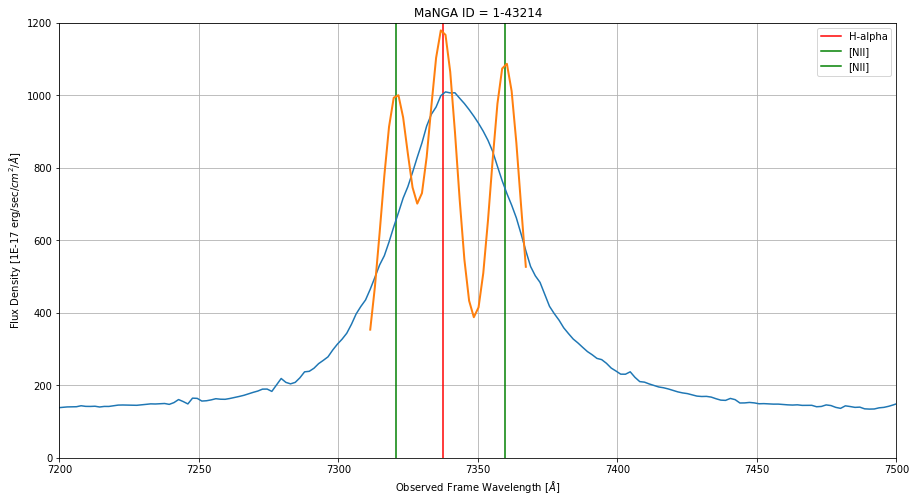

In [54]:
for plateifu in obj1_43214:
#     print(plateifu)
    data = fits.open(f'/Volumes/WD_External/MaNGA_Sample_with_[OIII]/manga-{plateifu[0]}-LOGCUBE.fits.gz')
    mangaid = data[0].header['MANGAID']
    
    flux = np.transpose(data['FLUX'].data, axes = (2, 1, 0))

    ivar = np.transpose(data['IVAR'].data, axes = (2, 1, 0))

    mask = np.transpose(data['MASK'].data, axes = (2, 1, 0))
    
    do_not_use = (mask & 2**10) != 0 
    
    wave = data['WAVE'].data
    
    sumflux = spectrum_gen(flux, ivar)
    
    peak_ha = 6563*(1+plateifu[1])
    peak_6548 = 6548*(1+plateifu[1])
    peak_6583 = 6583*(1+plateifu[1])

    bound_ha = np.where(np.logical_and(wave > (peak_ha-10), wave < (peak_ha+10)))
    bound_6548 = np.where(np.logical_and(wave > (peak_6548-10), wave < (peak_6548+10)))
    bound_6583 = np.where(np.logical_and(wave > (peak_6583-10), wave < (peak_6583+10)))
        
    lb_ha = bound_ha[0][0]
    ub_ha = bound_ha[0][-1]
    
    lb_6548 = bound_6548[0][0]
    ub_6548 = bound_6548[0][-1] 
    
    lb_6583 = bound_6583[0][0]
    ub_6583 = bound_6583[0][-1] 
    
    print(lb_6548, ub_6548, lb_ha, ub_ha, lb_6583, ub_6583)
    
    sumflux_slice_ha = sumflux[lb_ha : ub_ha]
    sumflux_slice_6548 = sumflux[lb_6548 : ub_6548]
    sumflux_slice_6583 = sumflux[lb_6583 : ub_6583]
    
    sumflux_slice = sumflux[lb_6548 : ub_6583]
    
    wave_slice_ha = wave[lb_ha : ub_ha]
    wave_slice_6548 = wave[lb_6548 : ub_6548]
    wave_slice_6583 = wave[lb_6583 : ub_6583]
    
    wave_slice = wave[lb_6548 : ub_6583]
        
    amp_ha = max(sumflux_slice_ha)
    mean_ha = peak_ha
    sigma_ha = np.std(wave_slice_ha)
    
    amp_6548 = max(sumflux_slice_6548)
    mean_6548 = peak_6548
    sigma_6548 = np.std(wave_slice_6548)
    
    amp_6583 = max(sumflux_slice_6583)
    mean_6583 = peak_6583
    sigma_6583 = np.std(wave_slice_6583)

    base = min(sumflux_slice)
    
    p0_ = [amp_ha, amp_6548, amp_6583,
           mean_ha, mean_6548, mean_6583,
           sigma_ha, sigma_6548, sigma_6583,
           base]
    
    popt, pcov = curve_fit(three_gaussian, wave_slice, sumflux_slice, p0 = p0_)

    plt.figure(figsize = (15,8))
    plt.grid()
    plt.axvline(6563*(1+plateifu[1]), color = 'red', label = 'H-alpha')
    plt.axvline(6548*(1+plateifu[1]), color = 'green', label = '[NII]')
    plt.axvline(6583*(1+plateifu[1]), color = 'green', label = '[NII]')
    plt.legend()

    plt.xlim(7200, 7500)
    plt.ylim(0,1200)
    
    plt.xlabel('Observed Frame Wavelength ' + r'[$\AA$]')
    plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
    plt.title(f'MaNGA ID = {mangaid}')
    
    plt.plot(wave, sumflux)
    plt.plot(wave_slice, three_gaussian(wave_slice, *popt), linewidth = 2)
    
    plt.show()

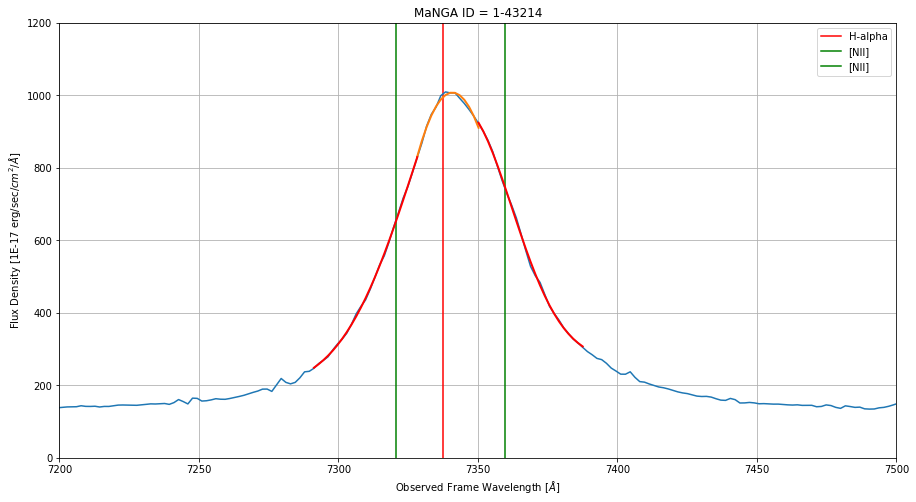

In [56]:
for plateifu in obj1_43214:
#     print(plateifu)
    data = fits.open(f'/Volumes/WD_External/MaNGA_Sample_with_[OIII]/manga-{plateifu[0]}-LOGCUBE.fits.gz')
    mangaid = data[0].header['MANGAID']
    
    flux = np.transpose(data['FLUX'].data, axes = (2, 1, 0))

    ivar = np.transpose(data['IVAR'].data, axes = (2, 1, 0))

    mask = np.transpose(data['MASK'].data, axes = (2, 1, 0))
    
    do_not_use = (mask & 2**10) != 0 
    
    wave = data['WAVE'].data
    
    sumflux = spectrum_gen(flux, ivar)
    
    peak_ha = 6563 * (1 + plateifu[1])
    peak_6548 = 6548 * (1 + plateifu[1])
    peak_6583 = 6583 *(1 + plateifu[1])

    bound_ha = np.where(np.logical_and(wave > peak_ha-10, wave < peak_ha+15))
    bound_6548 = np.where(np.logical_and(wave > peak_6548-30, wave < peak_6548+10))
    bound_6583 = np.where(np.logical_and(wave > peak_6583-10, wave < peak_6583+30))
        
    lb_ha = bound_ha[0][0]
    ub_ha = bound_ha[0][-1]
    
    lb_6548 = bound_6548[0][0]
    ub_6548 = bound_6548[0][-1] 
    
    lb_6583 = bound_6583[0][0]
    ub_6583 = bound_6583[0][-1] 
    
    sumflux_slice_ha = sumflux[lb_ha : ub_ha]
    sumflux_slice_6548 = sumflux[lb_6548 : ub_6548]
    sumflux_slice_6583 = sumflux[lb_6583 : ub_6583]

    wave_slice_ha = wave[lb_ha : ub_ha]
    wave_slice_6548 = wave[lb_6548 : ub_6548]
    wave_slice_6583 = wave[lb_6583 : ub_6583]
    
    amp_ha = max(sumflux_slice_ha)
    mean_ha = peak_ha
    sigma_ha = np.std(wave_slice_ha)
    base_ha = min(sumflux_slice_ha)
    
    amp_6548 = max(sumflux_slice_6548)
    mean_6548 = peak_6548
    sigma_6548 = np.std(wave_slice_6548)
    base_6548 = min(sumflux_slice_6548)
    
    amp_6583 = max(sumflux_slice_6583)
    mean_6583 = peak_6583
    sigma_6583 = np.std(wave_slice_6583)
    base_6583 = min(sumflux_slice_6583)

    p0_ha = [amp_ha, mean_ha, sigma_ha, base_ha]
    p0_6548 = [amp_6548, mean_6548, sigma_6548, base_6548]
    p0_6583 = [amp_6583, mean_6583, sigma_6583, base_6583]
    
    popt_ha, pcov_ha = curve_fit(gaussian, wave_slice_ha, sumflux_slice_ha, p0 = p0_ha)
    popt_6548, pcov_6548 = curve_fit(gaussian, wave_slice_6548, sumflux_slice_6548, p0 = p0_6548)
    popt_6583, pcov_6583 = curve_fit(gaussian, wave_slice_6583, sumflux_slice_6583, p0 = p0_6583)
    
    plt.figure(figsize = (15,8))
    plt.grid()
    plt.axvline(6563*(1+plateifu[1]), color = 'red', label = 'H-alpha')
    plt.axvline(6548*(1+plateifu[1]), color = 'green', label = '[NII]')
    plt.axvline(6583*(1+plateifu[1]), color = 'green', label = '[NII]')
    plt.legend()

    plt.xlim(7200, 7500)
    plt.ylim(0,1200)
    
    plt.xlabel('Observed Frame Wavelength ' + r'[$\AA$]')
    plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
    plt.title(f'MaNGA ID = {mangaid}')
    
    plt.plot(wave, sumflux)
    
    plt.plot(wave_slice_ha, gaussian(wave_slice_ha, *popt_ha), linewidth = 2)
    plt.plot(wave_slice_6548, gaussian(wave_slice_6548, *popt_6548), linewidth = 2, color = 'red')
    plt.plot(wave_slice_6583, gaussian(wave_slice_6583, *popt_6583), linewidth = 2, color = 'red')
    
    plt.show()